In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
#describing data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#data columns
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
#data shape
df.shape

(5110, 12)

In [7]:
#checking if there is any null values present in the dataset
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#filling null values 
#there will be difference after filling null values in BMI column
df['bmi'].fillna(value="25.00",inplace=True)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,25.00,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,25.00,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Data Visualization

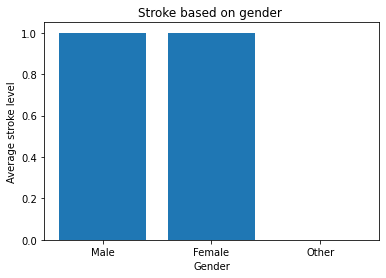

In [9]:
#barplot
x=df['gender']
y=df['stroke']
plt.title('Stroke based on gender ')
plt.xlabel('Gender')
plt.ylabel('Average stroke level')
plt.bar(x,y)
plt.show()

In [10]:
#totalstroke occurance
totalstroke=df['stroke'].sum()
totalstroke

249

In [11]:
#totalheartdisease
totalheartdisease=df['heart_disease'].sum()
totalheartdisease

276

In [12]:
#totalhypertension
totalhypertension=df['hypertension'].sum()
totalhypertension

498

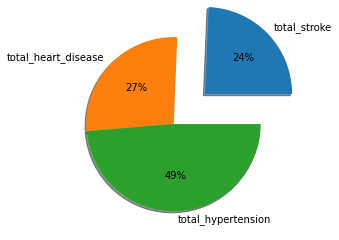

In [13]:
#pipplot
x=([totalstroke,totalheartdisease,totalhypertension])
mylabels=['total_stroke','total_heart_disease','total_hypertension']
myexplode=[0.5,0,0]
plt.pie(x,labels=mylabels,explode=myexplode,shadow=True,autopct = '%.0f%%')
plt.show()

In [14]:
#making new dataframe for filtering
newdf=df.copy()
print(newdf)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level    bmi   smoking_status  \
0           Private          Urban             228.69   36.6  form

In [15]:
#making work_type to private
newdf = newdf[newdf.work_type == "Private"]
newdf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,25.00,never smoked,0


In [16]:
#total no of stroke occured to people working in private job
privatestroke=sum(newdf.stroke)
print(privatestroke)

149


In [17]:
#making dataframe copy 
newdf1=df.copy()
newdf1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,25.00,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,25.00,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [18]:
#making dataframe where work_type is self-employed
newdf = newdf1[newdf1.work_type == "Self-employed"]
newdf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,25.00,never smoked,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
15,58202,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
22,68794,Female,79.0,0,0,Yes,Self-employed,Urban,228.70,26.6,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5088,22190,Female,64.0,1,0,Yes,Self-employed,Urban,76.89,30.2,Unknown,0
5097,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


In [19]:
#Total no of stroke occured to people who are self employed
selfemployedstroke=sum(newdf.stroke)
print(selfemployedstroke)

65


In [20]:
#making copy of orignal dataframe
newdf2=df.copy()
newdf2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,25.00,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,25.00,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [21]:
#making dataframe where worktype is Government job
newdf=newdf2[newdf2.work_type == 'Govt_job']
newdf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,25.00,Unknown,1
20,70630,Female,71.0,0,0,Yes,Govt_job,Rural,193.94,22.4,smokes,1
34,14248,Male,48.0,0,0,No,Govt_job,Urban,84.20,29.7,never smoked,1
44,7937,Male,60.0,1,0,Yes,Govt_job,Urban,213.03,20.2,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5090,4211,Male,26.0,0,0,No,Govt_job,Rural,100.85,21.0,smokes,0
5092,56799,Male,76.0,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,25.00,smokes,0
5096,41512,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0


In [22]:
#Total stroke occured to people who are doing government job
govtstroke=sum(newdf.stroke)
print(govtstroke)

33


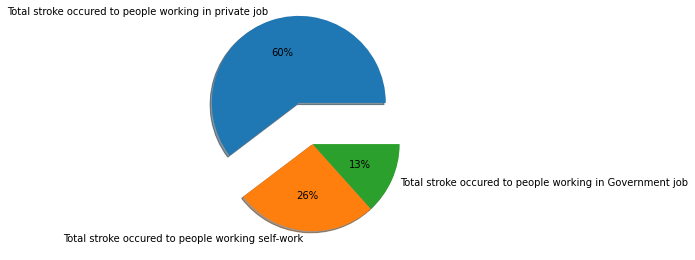

In [23]:
#pieplot showing stroke occured to people doing different types of job

x=([privatestroke,selfemployedstroke,govtstroke])
mylabels=['Total stroke occured to people working in private job','Total stroke occured to people working self-work','Total stroke occured to people working in Government job']
myexplode=[0.5,0,0]
plt.pie(x,labels=mylabels,shadow=True,explode=myexplode,autopct = '%.0f%%')
plt.show()

In [24]:
#making copy of orginal dataframe to new one
newdf3=df.copy()
newdf3

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,25.00,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,25.00,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [25]:
#filtering dataframe where smoking status is formerly smoked
newdf = newdf3[newdf3.smoking_status == "formerly smoked"]
newdf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
24,4219,Male,71.0,0,0,Yes,Private,Urban,102.87,27.2,formerly smoked,1
26,38047,Female,65.0,0,0,Yes,Private,Rural,100.98,28.2,formerly smoked,1
29,69160,Male,59.0,0,0,Yes,Private,Rural,211.78,25.00,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5068,49598,Male,80.0,0,0,Yes,Self-employed,Urban,120.03,24.3,formerly smoked,0
5081,37680,Male,55.0,0,0,Yes,Govt_job,Rural,108.35,40.8,formerly smoked,0
5085,53525,Female,72.0,0,0,Yes,Private,Urban,83.89,33.1,formerly smoked,0
5087,26214,Female,63.0,0,0,Yes,Self-employed,Rural,75.93,34.7,formerly smoked,0


In [26]:
#total stroke occured to people who formerly smoked
totalformerlysmoked=sum(newdf.stroke)
print(totalformerlysmoked)

70


In [27]:
#making dataframe copy of original one
newdf4=df.copy()
newdf4

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,25.00,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,25.00,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [28]:
#filtering dataframe of people who never smoked
newdf=newdf4[newdf4.smoking_status=='never smoked']
newdf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,25.00,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,25.00,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


In [29]:
#total stroke occured to people who never smoked
totalneversmoked=sum(newdf.stroke)
totalneversmoked

90

In [30]:
#making dataframe copy
newdf5=df.copy()
newdf5

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,25.00,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,25.00,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [31]:
#filtering dataframe where people smokes
newdf=newdf5[newdf5.smoking_status=='smokes']
newdf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
12,12175,Female,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1
16,56112,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5082,24552,Female,44.0,0,0,Yes,Private,Rural,72.03,37.5,smokes,0
5084,29540,Male,67.0,0,0,Yes,Private,Rural,97.04,26.9,smokes,0
5090,4211,Male,26.0,0,0,No,Govt_job,Rural,100.85,21.0,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,25.00,smokes,0


In [32]:
#total stroke occured to people who smokes
totalsmokestroke=sum(newdf.stroke)
totalsmokestroke

42

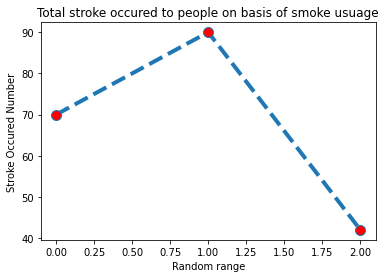

In [33]:
#subplot
x=([totalformerlysmoked,totalneversmoked,totalsmokestroke])
plt.plot(x,marker='o',ms=10,mfc='r',linestyle='dashed',linewidth=4)
plt.title('Total stroke occured to people on basis of smoke usuage')
plt.ylabel('Stroke Occured Number')
plt.xlabel('Random range')
plt.show()

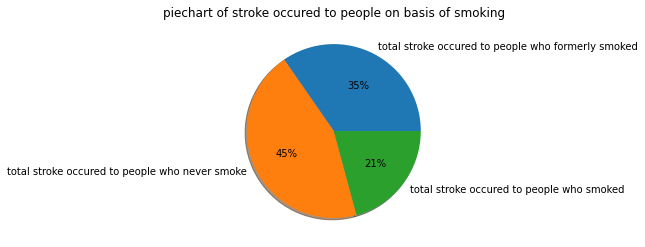

In [34]:
#pieplot 
x=([totalformerlysmoked,totalneversmoked,totalsmokestroke])
mylabels=['total stroke occured to people who formerly smoked','total stroke occured to people who never smoke','total stroke occured to people who smoked']
myexplode=[0,0,0]
plt.pie(x,labels=mylabels,shadow=True,explode=myexplode,autopct='%.0f%%')
plt.title('piechart of stroke occured to people on basis of smoking')
plt.show()